# Optimization
project1

In [1]:
import pandas as pd;
import numpy as np;
data= pd.read_excel("C:/Users/Christina/Desktop/ΜΕΤΑΠΤΥΧΙΑΚΟ/βελτιστοποίηση/PROJECT-1/mydata.xlsx", header=None)

In [2]:
data.to_csv("mydata.csv")

In [3]:
data.shape

(30, 2)

In [4]:
data.columns= ['Day','Covid Cases']

In [5]:
print(data.head(5))

   Day  Covid Cases
0    1        23060
1    2        23495
2    3        23947
3    4        24450
4    5        24932


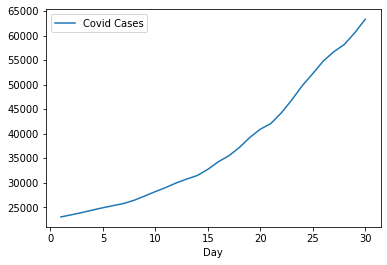

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt
data.plot('Day')
plt.show()

This plot shows for each day how many cases we have in country in total. Example: until day 15 we have approx 35000 cases in total in country, from the beginning of virus. Below we will scale data. Days will be in range [0.1,3] and cases in range [2,7] 

In [7]:
array=data.values
X = array[:,0]
Y = array[:,1]

In [8]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [9]:
X_scaled = []
Y_scaled= []
for i in X:
    X_scaled.append(X[i-1]/10)
    Y_scaled.append(Y[i-1]/10000)
    

In [10]:
x = np.array(X_scaled)
y = np.array(Y_scaled)

In [13]:
import sympy as sym
a0, a1, a2, a3, a4 = sym.symbols( 'a0 a1 a2 a3 a4')

In [69]:
import math
list = []
for i in X:
    list.append( (a0 + a1*x[i-1] + a2*math.pow(x[i-1],2) + a3*math.pow(x[i-1],3) + a4*math.pow(x[i-1],4) - y[i-1]) ** 2)

In [70]:
list[0]

5.317636*(0.433651344319167*a0 + 0.0433651344319167*a1 + 0.00433651344319167*a2 + 0.000433651344319167*a3 + 4.33651344319167e-5*a4 - 1)**2

# its okay this strange result, its correct I checked it! Look:

In [71]:
triallist = []
for i in X:
    triallist.append( (a0 + a1*x[i-1] + a2*math.pow(x[i-1],2) + a3*math.pow(x[i-1],3) + a4*math.pow(x[i-1],4) - y[i-1]))

In [72]:
triallist[0]

a0 + 0.1*a1 + 0.01*a2 + 0.001*a3 + 0.0001*a4 - 2.306

In [73]:
triallist[0] * triallist[0]

5.317636*(0.433651344319167*a0 + 0.0433651344319167*a1 + 0.00433651344319167*a2 + 0.000433651344319167*a3 + 4.33651344319167e-5*a4 - 1)**2

# Function f(a)

In [77]:
fa=sum(list) #this is our function

# Derivatives

In [78]:
#derivatives
da0= sym.diff(fa, a0)
da1= sym.diff(fa, a1)
da2= sym.diff(fa, a2)
da3= sym.diff(fa, a3)
da4= sym.diff(fa, a4)

In [83]:
gradientfa=[]
gradientfa.append(da0)
gradientfa.append(da1)
gradientfa.append(da2)
gradientfa.append(da3)
gradientfa.append(da4)

# Gradient

In [89]:
gradientfa = np.array(gradientfa) # THE GRADIENT OF f

In [99]:
gradientfa[4] 

1054.7998*a0 + 2679.7485*a1 + 7001.86243*a2 + 18674.502765*a3 + 50592.37331998*a4 - 5598.92290578

# Second derivatives

In [113]:
#second derivatives of a0
dda0_a0=sym.diff(da0, a0)
dda0_a1=sym.diff(da0, a1)
dda0_a2=sym.diff(da0, a2)
dda0_a3=sym.diff(da0, a3)
dda0_a4=sym.diff(da0, a4)

In [114]:
#second derivatives of a1
dda1_a0=sym.diff(da1, a0)
dda1_a1=sym.diff(da1, a1)
dda1_a2=sym.diff(da1, a2)
dda1_a3=sym.diff(da1, a3)
dda1_a4=sym.diff(da1, a4)

In [115]:
#second derivatives of a2
dda2_a0=sym.diff(da2, a0)
dda2_a1=sym.diff(da2, a1)
dda2_a2=sym.diff(da2, a2)
dda2_a3=sym.diff(da2, a3)
dda2_a4=sym.diff(da2, a4)

In [116]:
#second derivatives of a3
dda3_a0=sym.diff(da3, a0)
dda3_a1=sym.diff(da3, a1)
dda3_a2=sym.diff(da3, a2)
dda3_a3=sym.diff(da3, a3)
dda3_a4=sym.diff(da3, a4)

In [117]:
#second derivatives of a3
dda4_a0=sym.diff(da4, a0)
dda4_a1=sym.diff(da4, a1)
dda4_a2=sym.diff(da4, a2)
dda4_a3=sym.diff(da4, a3)
dda4_a4=sym.diff(da4, a4)

# Hessian Matrix

In [123]:
Hessian = np.array([[dda0_a0, dda0_a1, dda0_a2,dda0_a3,dda0_a4], [dda1_a0, dda1_a1, dda1_a2,dda1_a3,dda1_a4], 
                    [dda2_a0, dda2_a1, dda2_a2,dda2_a3,dda2_a4], [dda3_a0, dda3_a1, dda3_a2,dda3_a3,dda3_a4], 
                    [dda4_a0, dda4_a1, dda4_a2,dda4_a3,dda4_a4]])

In [125]:
Hessian.shape

(5, 5)

In [127]:
Hessian[0][0]

60.0000000000000